In [1]:
from __future__ import division
import numpy as np
from scipy.integrate import ode
import math
import matplotlib.pyplot as plt
import seaborn
from numpy.linalg import inv
import sys
from scipy.optimize import minimize
import dubins
np.set_printoptions(precision=3,suppress=True)

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def double(n):   
    return [2**k for k in range(n)]

In [3]:
def kinematics_constraints(j, dt=0.1):
    def _f(X):
        x,y,theta,xn,yn,thetan = X[3*j:3*j+6]
        v,w = X[3*N+2*j:3*N+2*j+2]
        out = [x + v*math.cos(theta)*dt-xn, y + v*math.sin(theta)*dt-yn, theta+w*dt-thetan]
        #print "out: ", j, "|", x,y,theta, xn,yn,thetan, ">", out
        return np.array(out)
    return _f

def obstacle_constraint(p, q, r, j):
    def _obstacle(X):
        x, y = X[3*j:3*j+2]
        return (x - p) ** 2 + (y - q) ** 2 - r ** 2
    return _obstacle

In [4]:
def cost_fn(coeff):
    coeff = np.array(coeff)
    def _fn(X):
        U = X[3*N:]
        return sum(coeff*U*U)
    return _fn

In [5]:
#cons[1]['fun'](np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))

In [31]:
N=20
coeff = [1] * (2*N-2)
#coeff = [v for p in zip(double(N-1), [1]*(N-1)) for v in p] #interleave
Xinit = [0,0,math.pi/4]
Xgoal =  [8,12, math.pi/4]

In [32]:
#X0 = np.array([0,0,math.pi/4,0,0,0,0,0,0,8,12,math.pi/4,0,0,0,0,0,0])
X0 = [0]*(3*N) + [1]*(2*N-2)
X0[0:3] = Xinit
X0[3*N-3:3*N] = Xgoal
X0 = np.array(X0)


In [33]:
cons = []
for j in range(N-1):
    cons.append({'type':'eq', 'fun':kinematics_constraints(j)})

cons.append({'type':'eq', 'fun':lambda X: X[0]})
cons.append({'type':'eq', 'fun':lambda X: X[1]})
cons.append({'type':'eq', 'fun':lambda X: X[2]-math.pi/4})

cons.append({'type':'eq', 'fun':lambda X: X[3*N-3]-Xgoal[0]})
cons.append({'type':'eq', 'fun':lambda X: X[3*N-2]-Xgoal[1]})
cons.append({'type':'eq', 'fun':lambda X: X[3*N-1]-Xgoal[2]})

for j in range(N-1):        
    cons.append({'type':'ineq', 'fun': obstacle_constraint(3, 4, 1.5, j)})
    cons.append({'type':'ineq', 'fun': obstacle_constraint(5, 8, 1.5, j)})

#cons.append({'type':'ineq', 'fun':lambda X: 10-X[30]})
#cons.append({'type':'ineq', 'fun':lambda X: 10-X[32]})
#cons.append({'type':'ineq', 'fun':lambda X: 10-X[34]})

In [34]:
#cons[2]['fun'](X0)

In [35]:
# minimize(cost_fn, X0, constraints=cons, callback=myprint)
all_xs = []

r=minimize(cost_fn(coeff), X0, constraints=cons, options={'maxiter':100}, callback=lambda a:all_xs.append(np.copy(a)))
r

     fun: 1359.5793183665296
     jac: array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,  13.045,   7.604,  16.186,
         3.277,  16.841,   1.059,  16.957,  -0.417,  16.918,  -2.187,
        16.588,  -5.444,  16.101,  -8.672,  15.642,  -3.801,  16.538,
        -1.187,  16.696,   0.627,  16.619,   2.867,  16.064,   6.916,
        16.597,   6.166,  16.326,   2.689,  16.75 ,   0.984,  16.829,
        -0.033,  16.827,  -1.071,  16.736,  -2.859,

In [36]:
r.x[0:3*N].reshape((N,3))

array([[ -0.   ,   0.   ,   0.785],
       [  0.461,   0.461,   1.166],
       [  0.78 ,   1.205,   1.329],
       [  0.981,   2.023,   1.382],
       [  1.14 ,   2.856,   1.362],
       [  1.316,   3.683,   1.252],
       [  1.576,   4.471,   0.98 ],
       [  2.024,   5.139,   0.546],
       [  2.692,   5.546,   0.356],
       [  3.467,   5.834,   0.297],
       [  4.266,   6.078,   0.328],
       [  5.052,   6.346,   0.472],
       [  5.768,   6.711,   0.818],
       [  6.335,   7.317,   1.126],
       [  6.687,   8.053,   1.26 ],
       [  6.943,   8.851,   1.309],
       [  7.16 ,   9.664,   1.308],
       [  7.379,  10.476,   1.254],
       [  7.639,  11.271,   1.111],
       [  8.   ,  12.   ,   0.785]])

In [37]:
r.x[3*N:].reshape((N-1,2))

array([[ 6.523,  3.802],
       [ 8.093,  1.639],
       [ 8.421,  0.529],
       [ 8.479, -0.208],
       [ 8.459, -1.094],
       [ 8.294, -2.722],
       [ 8.05 , -4.336],
       [ 7.821, -1.9  ],
       [ 8.269, -0.594],
       [ 8.348,  0.313],
       [ 8.31 ,  1.433],
       [ 8.032,  3.458],
       [ 8.299,  3.083],
       [ 8.162,  1.344],
       [ 8.375,  0.492],
       [ 8.414, -0.016],
       [ 8.413, -0.536],
       [ 8.368, -1.43 ],
       [ 8.131, -3.258]])

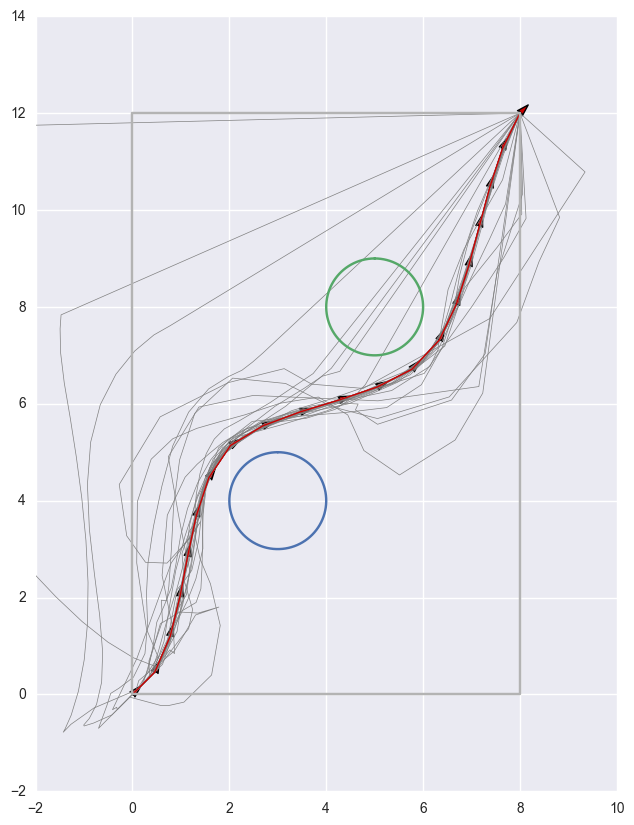

In [68]:

fig = plt.figure(figsize=(20,10))

ax = fig.add_axes()

# Plot other paths
for xs in all_xs:
    x_y_phi_t = xs[0:3*N].reshape((N,3))
    #v_omega_t = xs[3*N:].reshape((N-1,2))
    plt.plot(x_y_phi_t[:, 0], x_y_phi_t[:, 1], color='0.5', linewidth=0.5)

x_y_phi = r.x[0:3*N].reshape((N,3)) 
v_omega = r.x[3*N:].reshape((N-1,2))

plt.quiver(x_y_phi[:, 0], x_y_phi[:, 1], np.cos(x_y_phi[:, 2]), np.sin(x_y_phi[:, 2]), scale=50, color='#cc0000', linewidth=1)
plt.plot(x_y_phi[:, 0], x_y_phi[:, 1], color='#cc0000', linewidth=1)

plt.xlim(-2, 10)
plt.ylim(-2, 14)
plt.axes().set_aspect('equal')

plt.plot([0, 8, 8, 0, 0], [0, 0, 12, 12, 0], color='0.7')

x = np.linspace(0, 2 * math.pi, num=100)
plt.plot(np.sin(x) + 3, np.cos(x) + 4)
plt.plot(np.sin(x) + 5, np.cos(x) + 8)

plt.show()

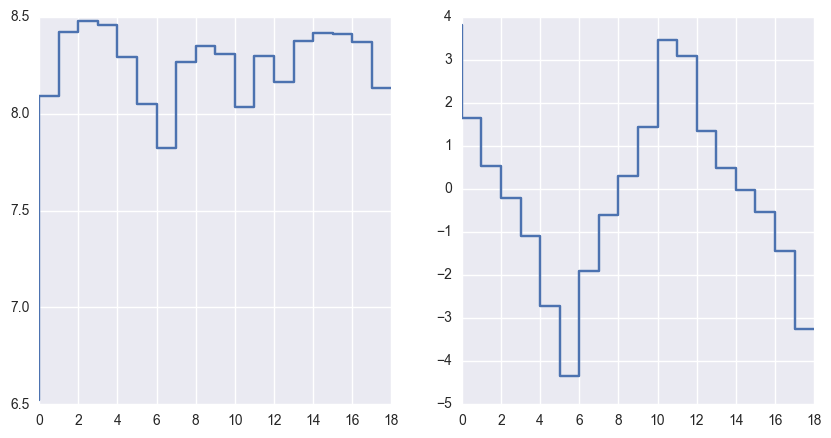

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(v_omega[:, 0], drawstyle='steps')
ax2.plot(v_omega[:, 1], drawstyle='steps')
plt.show()